In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('agg_Xtrain.csv').set_index('Unnamed: 0')
X_test = pd.read_csv('agg_Xtest.csv').set_index('Unnamed: 0')
y_train = pd.read_csv('agg_ytrain.csv').set_index('Unnamed: 0')
y_test = pd.read_csv('agg_ytest.csv').set_index('Unnamed: 0')

In [7]:

tscv = TimeSeriesSplit(n_splits=10) #maybe k fold? or timeseries?

parameters = {'hidden_layer_sizes':[10,50],
              'alpha':[0.0001, 0.01, 0.1],
              'learning_rate':['constant', 'adaptive'],
              'max_iter':[100, 200,500],
              'epsilon': [1e-10, 1e-08],
}

mlp = MLPClassifier()
cv = GridSearchCV(mlp, param_grid=parameters, cv=tscv)

In [8]:
%%time
cv.fit(X_train,y_train)
cv.best_params_

CPU times: user 33min 17s, sys: 8min 48s, total: 42min 5s
Wall time: 9min 11s


{'alpha': 0.01,
 'epsilon': 1e-10,
 'hidden_layer_sizes': 10,
 'learning_rate': 'adaptive',
 'max_iter': 100}

In [9]:
%%time
mlp.set_params(**cv.best_params_)
mlp.fit(X_train,y_train)
pred = mlp.predict(X_test)
f1 = f1_score(y_test, pred, average='weighted') # which average to use??
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')

print(f"precision: {precision}, recall: {recall}, f1score: {f1}")

precision: 0.23107904982240451, recall: 0.3182957393483709, f1score: 0.25031696695566596
CPU times: user 1.47 s, sys: 431 ms, total: 1.9 s
Wall time: 410 ms


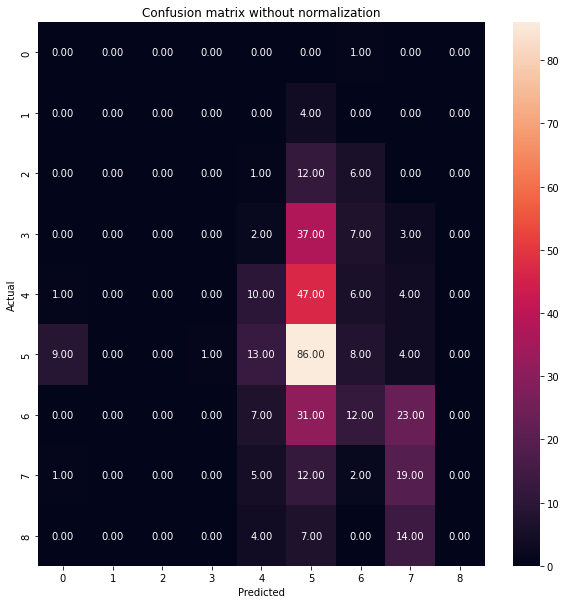

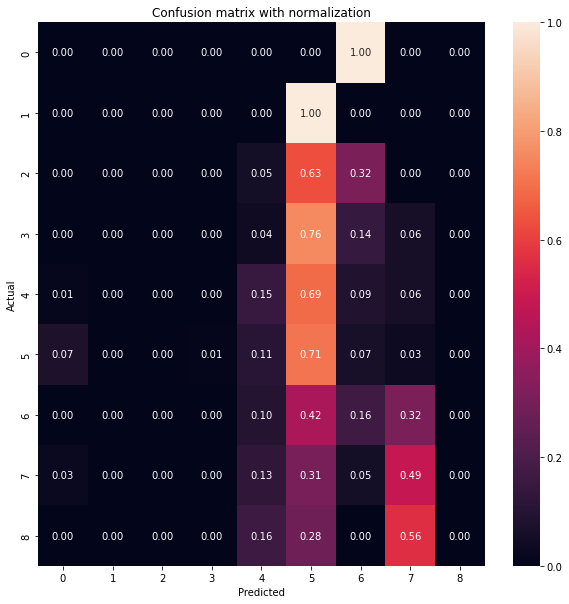

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


matrix = confusion_matrix(y_test, pred)
matrix_normalized = confusion_matrix(y_test, pred, normalize='true')

fig1, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Confusion matrix without normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

fig2, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_normalized, annot=True, fmt='.2f')
plt.title('Confusion matrix with normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
